#### Data Import 

In [1]:
# Imports
import pandas as pd
import warnings
from helpers import * 

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    # Import entities / skills / wikipedia
    entities = pd.read_csv("../data/classeek_entities.csv")
    skills = pd.read_csv("../data/classeek_skills.csv")
    alt_names = pd.read_csv("../data/classeek_alternative_names.csv")
    performances = pd.read_csv("../data/classeek_performances.csv")
    pieces = pd.read_csv("../data/classeek_pieces.csv")
    wikipedia_pv = pd.read_csv("../data/classeek_wikipedia_page_views.csv")
    mediamentions = pd.read_csv("../data/classeek_media_mentions.csv")
    biographies = pd.read_csv("../data/classeek_biographies.csv")

    entities_performances = pd.read_csv("../data/classeek_entities_performances.csv")
    entities_pieces = pd.read_csv("../data/classeek_entities_pieces.csv")
    entities_skills = pd.read_csv("../data/classeek_entity_skills.csv")

#
# BBC Symphony Orchestra
#### Entity ID : bd01268d-8a66-4139-88d8-13cffa7702d8

In [2]:
entity_id = 'bd01268d-8a66-4139-88d8-13cffa7702d8'

## Basic Informations 

In [3]:
# Basic information about the entity 
entity_info = get_info(entity_id, entities, entities_performances, entities_pieces, entities_skills, mediamentions, 
             wikipedia_pv, biographies, alt_names, include_lists = True)
infos = ['id', 'name', 'gender', 'alive', 'birth_date', 'death_date', 'current_influence_percentile']
entity_info.iloc[:, 0:7]

,id,name,gender,alive,birth_date,death_date,current_influence_percentile
76833,bd01268d-8a66-4139-88d8-13cffa7702d8,Bbc Symphony Orchestra,NaN,True,NaN,NaN,99.0


In [4]:
# Number of cells in other tables linked to that entity 
entity_info.iloc[:, 7:13]

,nb_perf,nb_pieces,nb_media_mentions,nb_skills,nb_alt_names,nb_biographies
76833,3969,4358,427,0,1,0


## 1 - Performances 

In [5]:
# Extract performances 
df_perfs = performances[performances.id.apply(lambda x : x in entity_info.perf_list.to_list()[0])].loc[:, ['date', 'venue', 'country', 'city', 'title', 'key', 'continent']]
df_perfs.head(10)

,date,venue,country,city,title,key,continent
227,1965-08-31 19:30:00.000000,Royal Albert Hall,United Kingdom,NaN,Prom 39,NaN,Europe
7656,2019-08-24 19:30:00.000000,Royal Albert Hall,United Kingdom,NaN,"Prom 48: Rachmaninov, Prokofiev & Silvestri",NaN,Europe
7992,2019-07-24 19:30:00.000000,Royal Albert Hall,United Kingdom,NaN,Prom 8: Invitation to the Dance,NaN,Europe
7993,2019-09-14 19:15:00.000000,Royal Albert Hall,United Kingdom,NaN,Prom 75: Last Night of the Proms,NaN,Europe
8059,2019-08-19 19:30:00.000000,Royal Albert Hall,United Kingdom,NaN,Prom 43: Beethoven’s Ninth Symphony,NaN,Europe
8063,2019-08-11 20:00:00.000000,Royal Albert Hall,United Kingdom,NaN,"Prom 33: Mahler, Schubert & Glanert",NaN,Europe
22681,2019-09-08 19:30:00.000000,Royal Albert Hall,United Kingdom,NaN,Prom 67: Sakari Oramo conducts Sibelius,NaN,Europe
24009,2019-08-29 19:00:00.000000,Royal Albert Hall,United Kingdom,NaN,Prom 53: Elgar's The Music Makers,NaN,Europe
24043,2019-08-06 19:30:00.000000,Royal Albert Hall,United Kingdom,NaN,"Prom 25: Tchaikovsky, Sibelius & Weinberg",NaN,Europe
24120,2019-07-28 19:30:00.000000,Royal Albert Hall,United Kingdom,NaN,Prom 13: ‘From the Canyons to the Stars …’,NaN,Europe


## 2 - Pieces 

In [6]:
df_pieces = pieces[pieces.id.apply(lambda x : x in entity_info.pieces_list.to_list()[0])]
df_pieces.loc[:, ['composer', 'title', 'source']].head(10)

,composer,title,source
18072,Béla Bartók,Viola Concerto,20
18798,Pyotr Ilyich Tchaikovsky,Manfred,20
20499,Trad.,Londonderry Air (Danny Boy),20
27121,Maurice Ravel,Tzigane,20
27270,Ludwig Van Beethoven,Concerto for violin,20
27272,Johannes Brahms,Double Concerto for violin and cello in A minor,20
27274,Igor Stravinsky,The Rite of Spring,20
27276,Claude Debussy,Jeux,20
27278,Igor Stravinsky,Petrushka (1911 version),20
27291,Mozart Amadé Wolfgang,klavierkonzert,20


## 3 - Media mentions 

In [7]:
df_medias = mediamentions[mediamentions.id.apply(lambda x : x in entity_info.media_mentions.to_list()[0])]
df_medias.loc[:, ['comparable_text', 'url', 'header_text']].head(10)

,comparable_text,url,header_text
42532,The Listening Room: Episode 104 (8.1.21),https://www.gramophone.co.uk/blogs/article/the...,The Listening Room: Episode 104 (8.1.21)
42533,The 50 best Beethoven albums (2021 update),https://www.gramophone.co.uk/features/article/...,The 50 best Beethoven albums (2021 update)
42534,The best new classical albums: Editor's Choice...,https://www.gramophone.co.uk/features/article/...,The best new classical albums: Editor's Choice...
42535,Mahler's Symphony No 4: a complete guide to th...,https://www.gramophone.co.uk/features/article/...,Mahler's Symphony No 4: a complete guide to th...
42536,Gramophone launches Orchestra of the Year Awar...,https://www.gramophone.co.uk/classical-music-n...,Gramophone launches Orchestra of the Year Awar...
42537,"Orchestra of the Year 2020 – the nominees, Part 2",https://www.gramophone.co.uk/podcasts/article/...,"Orchestra of the Year 2020 – the nominees, Part 2"
42538,How do you edit together a ‘Grand Virtual Orch...,https://www.gramophone.co.uk/features/article/...,How do you edit together a ‘Grand Virtual Orch...
42539,BBC Proms reveals full details of re-imagined ...,https://www.gramophone.co.uk/classical-music-n...,BBC Proms reveals full details of re-imagined ...
42540,Gramophone's Orchestra of the Year 2020: revea...,https://www.gramophone.co.uk/classical-music-n...,Gramophone's Orchestra of the Year 2020: revea...
42541,Dalia Stasevska named Lahti Symphony Chief Con...,https://www.gramophone.co.uk/classical-music-n...,Dalia Stasevska named Lahti Symphony Chief Con...


In [16]:
# One example of media mentions
if len(df_medias) > 0 : 
    print(df_medias.iloc[0].comparable_text)

The Listening Room: Episode 104 (8.1.21)


## 4 - Wikipedia Page Views 

In [9]:
df_wiki = wikipedia_pv[wikipedia_pv.id.apply(lambda x : x in entity_info.wiki_pv.to_list()[0])]
df_wiki.loc[:, ['en', 'fr', 'de', 'it', 'ru', 'period_start_date']].head(5)

,en,fr,de,it,ru,period_start_date
5408,2076.0,4.0,152.0,69.0,NaN,2015-10-01
5409,1744.0,9.0,125.0,68.0,NaN,2015-11-01
5410,1614.0,13.0,213.0,48.0,NaN,2015-12-01
5411,2111.0,19.0,211.0,65.0,NaN,2016-01-01
5412,1609.0,6.0,138.0,66.0,NaN,2016-02-01


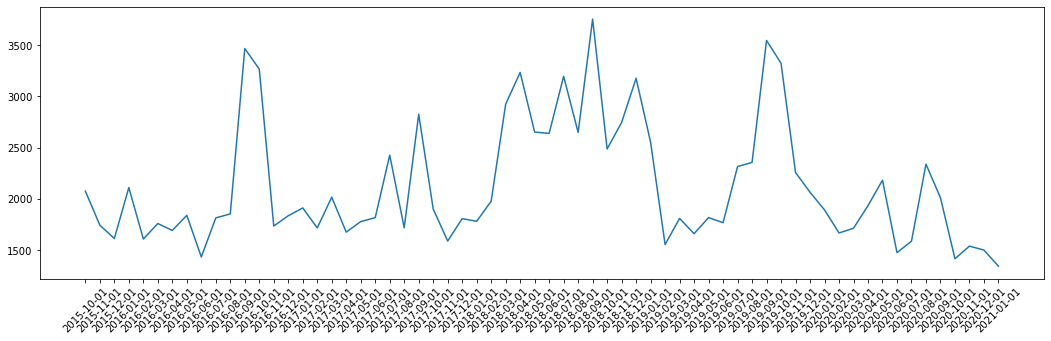

In [10]:
import matplotlib.pyplot as plt
x = df_wiki.period_start_date.to_list()
y = df_wiki.en.to_list()
plt.figure(figsize=[18, 5])
plt.xticks(rotation=45)
plt.plot(x, y)

## 5 - Skills 

In [11]:
df_skills = skills[skills.id.apply(lambda x : x in entity_info.skills_list.to_list()[0])]
df_skills.loc[:, ['name']]

,name


## 6 - Alternative Names 

Alternative names are the names used by developpers to map down several entities to one during scraping operations. They are not related to the aliases found with fuzzy string matching during cleaning. 

In [12]:
entity_info.alter_names.to_list()

[['bbc symphony orchestra']]

## 7 - Biographies 

In [13]:
df_bios = biographies[biographies.id.apply(lambda x : x in entity_info.bios_list.to_list()[0])]
df_bios.loc[:, ['detail', 'year', 'source']]

,detail,year,source


In [14]:
# One bography example 
if len(df_bios) > 0 : 
    print(df_bios.sample().detail)